In [1]:
from customtree import *
from customtreeplot import *
import numpy as np

In [2]:
denom_pow_max = 16
plotargs = []
for denom_pow in range(denom_pow_max, 1, -1):
    denom = 1 << denom_pow
    t01 = 1 - (denom_pow - 2) / (denom_pow_max - 2)
    color = plt.cm.rainbow(t01)
    for v in range(denom//2+1, denom, 2):
        nu = 0
        for i in range(1, denom_pow + 1):
            if v & (1<<(denom_pow - i)):
                nu += i / (1<<i)
        nu_max = nu + 2 / denom
        x = v / denom
        H = - x * math.log2(x)
        linewidth = .25 + 4 ** (t01 - 1)
        plotargs.append((([x]*2, [(nu-H)/x, (nu_max-H)/x]), {"color":color, "linewidth":linewidth}))
        # if v == denom-1:
        #     plotargs.append((([0.5, x], [(nu_max-H)/x]*2), {"color":color, "linewidth":linewidth, "linestyle":'dashed', "label":f"$x \\leq 1-2^{{-{denom_pow}}}$"}))

/tmp/ipykernel_1162295/451404126.py:4: RuntimeWarning: divide by zero encountered in log
  x_axis_transforms = (lambda x:-np.log(1-x)/np.log(2), lambda x:1-np.exp(-x*np.log(2)))


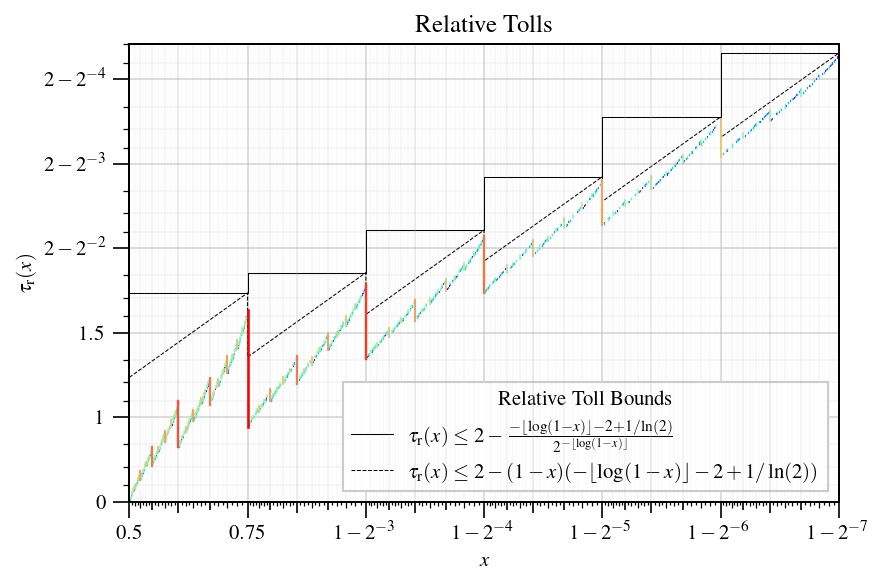

In [3]:
fig, ax = plt.subplots(figsize=(6,4), tight_layout=True, dpi=150)

# use a log scale centered on (x=1, y=2) to illustrate asymptotic behavior
x_axis_transforms = (lambda x:-np.log(1-x)/np.log(2), lambda x:1-np.exp(-x*np.log(2)))
y_axis_transforms = (lambda y:-np.log(2-y)/np.log(2), lambda y:2-np.exp(-y*np.log(2)))
ax.set_xscale('function', functions=x_axis_transforms)
ax.set_yscale('function', functions=y_axis_transforms)
num_pieces = 6
xlim = (0.5, 1 - 2**-(num_pieces+1))
ylim = (0, 2-num_pieces*2**-(num_pieces+1))
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)


# plot the piecewise constant and linear bounds
piecewise_constant_xs = []
piecewise_constant_ys = []
for i in range(2,denom_pow_max):
    x0 = 1 - 2**(1-i)
    x1 = 1 - 2**(-i)
    y  = 2 - (i - 2 + 1/math.log(2)) / 2**i
    piecewise_constant_xs.extend([x0, x1])
    piecewise_constant_ys.extend([y, y])
ax.plot(piecewise_constant_xs,
        piecewise_constant_ys,
        color='black',
        linewidth=0.5,
        linestyle='-',
        label=r"$\tau_{\rm r}(x) \leq 2 - \frac{-\lfloor\log(1-x)\rfloor-2+1/\ln(2)}{2^{-\lfloor\log(1-x)\rfloor}}$")
piecewise_linear_xs = []
piecewise_linear_ys = []
for i in range(2,denom_pow_max):
    x0 = 1 - 2**(1-i)
    x1 = 1 - 2**(-i)
    # # using multiple points for the functionlog-functionlog is unnecessary
    # # because the line goes through (1, 2) by design,
    # # so it is still piecewise linear in the deformed space
    # for t in range(1, 101):
    #     x = x1 * t/100 + x0 * (1-t/100)
    #     y = 2 - (1 - x) * (i - 2 + 1/math.log(2))
    #     piecewise_linear_xs.append(x)
    #     piecewise_linear_ys.append(y)
    piecewise_linear_xs.extend([x0, x1])
    piecewise_linear_ys.extend([2 - (1 - x) * (i - 2 + 1/math.log(2)) for x in [x0, x1]])
ax.plot(piecewise_linear_xs,
        piecewise_linear_ys,
        color='black',
        linewidth=0.5,
        linestyle='--',
        label=r"$\tau_{\rm r}(x) \leq 2 - (1-x)(-\lfloor\log(1-x)\rfloor-2+1/\ln(2))$")


# initialize extra axes for more ticks
num_axes = 3
new_axes = [ax.twiny() for _ in range(num_axes-1)]
for i in [0, 2**(denom_pow_max-2)-1]:
    for ax2 in new_axes:
        ax2.plot(*plotargs[i][0],**plotargs[i][1])
        ax2.set_xscale('function', functions=x_axis_transforms)
        ax2.set_yscale('function', functions=y_axis_transforms)
        ax2.set_xlim(*xlim)
        ax2.set_ylim(*ylim)


# plot the exact relative toll function
for arg, kwarg in plotargs:
    ax.plot(*arg,**kwarg)


# set up axes, ticks, and labels
len_fun = lambda x: 1.4**x
def getLocator(offset):
    return ticker.FixedLocator([1-j/2**offset*2**-x for x in range(1,num_pieces+2) for j in range(2**offset+1,2**(offset+1),2)])

ax.xaxis.set_major_locator(ticker.FixedLocator([1-2**-x for x in range(1,num_pieces+2)]))
ax.xaxis.set_minor_locator(getLocator(num_axes))
ax.yaxis.set_major_locator(ticker.FixedLocator([2-2**-x for x in range(-1,num_pieces+2)]))
ax.yaxis.set_minor_locator(ticker.FixedLocator([2-j/8*2**-x for x in range(-1,num_pieces+2) for j in range(5,8)]))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: r'$0.5$' if x==0.5 else r'$0.75$' if x==0.75 else f'$1-2^{{{round(math.log2(1-x))}}}$'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, i: r'$0$' if y==0 else r'$1$' if y==1 else r'$1.5$' if y==1.5 else f'$2-2^{{{round(math.log2(2-y))}}}$'))
ax.tick_params(which='major', length=len_fun(num_axes*2))
ax.tick_params(which='minor', length=len_fun(num_axes))

for i, ax2 in enumerate(new_axes):
    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_major_locator(getLocator(i+1))
    ax2.xaxis.set_minor_locator(getLocator(num_axes+i+1))
    ax2.tick_params(which='major', length=len_fun(num_axes*2-i-1))
    ax2.tick_params(which='minor', length=len_fun(num_axes-i-1))
    ax2.xaxis.set_major_formatter(ticker.NullFormatter())

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\tau_{\rm r}(x)$')
ax.set_title('Relative Tolls')
ax.legend()
ax.legend(framealpha=1,
          fancybox=False,
          fontsize=10,
          title='Relative Toll Bounds',
          loc='lower right',
          ncol=1)


# add grid lines
alpha0 = 0.5
alpha_ratio = 0.6
ax.grid(which='major', alpha=alpha0)
ax.grid(which='minor', alpha=alpha0*alpha_ratio**num_axes)
for i, ax2 in enumerate(new_axes):
    ax2.grid(which='major', alpha=alpha0*alpha_ratio**(i+1))
    ax2.grid(which='minor', alpha=alpha0*alpha_ratio**(num_axes+i+1))


# save the plot
fig.set_size_inches(6, 4)
fig.set_tight_layout(True)
fig.savefig(output_dir / 'relative-tolls.png')